In [2]:
from collections import Counter
from datetime import datetime
import json
from keras.models import load_model
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import text_to_word_sequence
import pickle
import numpy as np
from matplotlib import pyplot as plt
# caleb_path = '/Users/CalebKaijiLu/Documents/yelp_dataset/'
caleb_path = '/home/caleb/schoolwork/yelp_dataset/'
selva_path = ''

Using TensorFlow backend.


# Single Review Gender Prediction

In [3]:
with open("tokenizer_gender_single_server.pickle", "rb") as f:
       tokenizer = pickle.load(f)

model = load_model("yelp_gender_single_model_server.hdf5")

In [16]:
# replace with the data you want to classify
newtexts = ["My wife took me to dinner",'My husband took me to dinner','My friend took me to dinner','I went with my kids']
# note that we shouldn't call "fit" on the tokenizer again
sequences = tokenizer.texts_to_sequences(newtexts)
data = pad_sequences(sequences, maxlen=300)

# get predictions for each of your new texts
predictions = model.predict(data)
print(predictions)


[[ 0.02197664]
 [ 0.91792458]
 [ 0.540914  ]
 [ 0.60598183]]


In [40]:
# replace with the data you want to classify
newtexts = ['the food is amazing','Oh my god the food is amazing','oh my god the food is sooooo amazing','oh my god the food is sooooo amazing! I love this place!!','oh my god the food is sooooo amazing!! I luv this place!! ']
# note that we shouldn't call "fit" on the tokenizer again
sequences = tokenizer.texts_to_sequences(newtexts)
data = pad_sequences(sequences, maxlen=300)

# get predictions for each of your new texts
predictions = model.predict(data)
print(predictions)


[[ 0.49949434]
 [ 0.56273288]
 [ 0.75836354]
 [ 0.84929174]
 [ 0.87533987]]


# User-based Review Gender Prediction (TO DO)

In [5]:
with open("tokenizer_gender_single_server.pickle", "rb") as f:
       tokenizer = pickle.load(f)

model = load_model("yelp_sentiment_model_server.hdf5")

In [11]:
# replace with the data you want to classify
newtexts = ["My girlfriend and I stayed here for 3 nights and loved it."]
word_sequences = text_to_word_sequence(newtexts[0])
# note that we shouldn't call "fit" on the tokenizer again
sequences = tokenizer.texts_to_sequences(newtexts)
data = pad_sequences(sequences, maxlen=300)

# get predictions for each of your new texts
predictions = model.predict(data)
print(predictions)
print(word_sequences)

[[ 0.75240165]]
['my', 'girlfriend', 'and', 'i', 'stayed', 'here', 'for', '3', 'nights', 'and', 'loved', 'it']


# Explanations

## 1-gram Masking

In [34]:
#newtext = "My girlfriend and I stayed here for 3 nights and loved it."
#newtext = "by far the best nail salon I have been to."
newtext = "Ask for Kim or Steven to do your nails!"
word_sequence = text_to_word_sequence(newtext)
newtext = " ".join(word_sequence)
# note that we shouldn't call "fit" on the tokenizer again
sequences = tokenizer.texts_to_sequences([newtext])
data = pad_sequences(sequences, maxlen=300)

# get predictions for each of your new texts
orig_predictions = model.predict(data)
print(orig_predictions)
print(word_sequence)

[[ 0.8224622]]
['ask', 'for', 'kim', 'or', 'steven', 'to', 'do', 'your', 'nails']


[0 1 2 3 4 5 6 7 8]
['ask', 'for', 'kim', 'or', 'steven', 'to', 'do', 'your', 'nails']
[0.82479006, 0.82862306, 0.8358171, 0.83888799, 0.69181931, 0.74580151, 0.78236896, 0.73273522, 0.3401852]


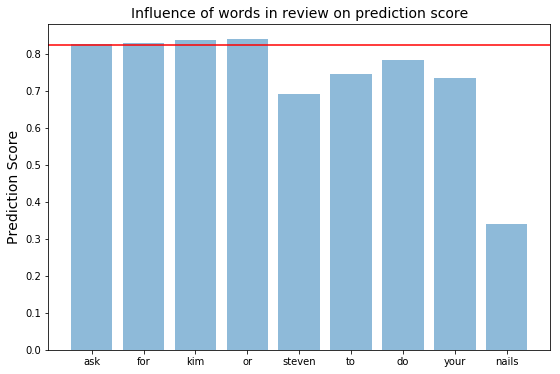

In [35]:
#word_set = set(word_sequence)
word_set = word_sequence
x = []
y = []
for word_to_remove in word_set:
    new_word_sequence = [word for word in word_sequence if word != word_to_remove]
    newtext = " ".join(new_word_sequence)
    sequences = tokenizer.texts_to_sequences([newtext])
    data = pad_sequences(sequences, maxlen=300)
    predictions = model.predict(data)
    x.append(word_to_remove)
    y.append(predictions[0][0])
    
x_pos = np.arange(len(x))
fontsize=14
#mpl.rcParams['xtick.labelsize'] = fontsize
#mpl.rcParams['ytick.labelsize'] = fontsize
plt.figure(num=1, figsize=(9, 6))
plt.bar(x_pos, y, align='center', alpha=0.5)
print(np.arange(len(x)))
print(x)
print(y)
plt.xticks(x_pos, x)
plt.axhline(y=orig_predictions[0][0], color='r', linestyle='-')
plt.ylabel('Prediction Score', fontsize=fontsize)
plt.title('Influence of words in review on prediction score', fontsize=fontsize)
plt.show()